In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
nifty_50_df = pd.read_csv("NIFTY 50.csv", index_col='Date', parse_dates=['Date'])
indiavix_df = pd.read_csv("INDIAVIX.csv", index_col='Date', parse_dates=['Date'])
nifty_100_df = pd.read_csv("NIFTY 100.csv", index_col='Date', parse_dates=['Date'])
nifty_500_df = pd.read_csv("NIFTY 500.csv", index_col='Date', parse_dates=['Date'])
nifty_auto_df = pd.read_csv("NIFTY AUTO.csv", index_col='Date', parse_dates=['Date'])
nifty_BANK_df = pd.read_csv("NIFTY BANK.csv", index_col='Date', parse_dates=['Date'])
nifty_FMCG_df = pd.read_csv("NIFTY FMCG.csv", index_col='Date', parse_dates=['Date'])
nifty_IT_df = pd.read_csv("NIFTY IT.csv", index_col='Date', parse_dates=['Date'])
nifty_metal_df = pd.read_csv("NIFTY METAL.csv", index_col='Date', parse_dates=['Date'])
nifty_midcap_150_df = pd.read_csv("NIFTY MIDCAP 150.csv", index_col='Date', parse_dates=['Date'])
nifty_next_50_df = pd.read_csv("NIFTY NEXT 50.csv", index_col='Date', parse_dates=['Date'])
nifty_pharma_df = pd.read_csv("NIFTY PHARMA.csv", index_col='Date', parse_dates=['Date'])
nifty_smallcap_250_df = pd.read_csv("NIFTY SMALLCAP 250.csv", index_col='Date', parse_dates=['Date'])

In [4]:
list_df=[nifty_50_df,indiavix_df, nifty_100_df ,nifty_500_df ,nifty_auto_df , nifty_BANK_df , nifty_FMCG_df, nifty_IT_df ,nifty_metal_df, nifty_midcap_150_df ,nifty_next_50_df ,nifty_pharma_df ,nifty_smallcap_250_df]

In [5]:
nifty_50_df.tail()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2020-05-04,9533.50,9533.50,9266.95,9293.50,NaN,NaN,21.39,2.65,1.64
2020-05-05,9429.40,9450.90,9190.75,9205.60,725196178.0,2.970020e+11,21.19,2.62,1.65
2020-05-06,9226.80,9346.90,9116.50,9270.90,722185448.0,3.079810e+11,21.34,2.64,1.64
2020-05-07,9234.05,9277.85,9175.90,9199.05,708740416.0,5.970553e+11,21.18,2.62,1.65
2020-05-08,9376.95,9382.65,9238.20,9251.50,609053504.0,3.074345e+11,21.28,2.64,1.64


In [6]:
nifty_50_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5061 entries, 2000-01-03 to 2020-05-08
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5061 non-null   float64
 1   High       5061 non-null   float64
 2   Low        5061 non-null   float64
 3   Close      5061 non-null   float64
 4   Volume     5060 non-null   float64
 5   Turnover   5060 non-null   float64
 6   P/E        5061 non-null   float64
 7   P/B        5061 non-null   float64
 8   Div Yield  5061 non-null   float64
dtypes: float64(9)
memory usage: 395.4 KB


In [7]:
def fill(df):
    return df.fillna(method='ffill')

In [8]:
nifty_50_df=fill(nifty_50_df)

In [9]:
nifty_50_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5061 entries, 2000-01-03 to 2020-05-08
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5061 non-null   float64
 1   High       5061 non-null   float64
 2   Low        5061 non-null   float64
 3   Close      5061 non-null   float64
 4   Volume     5061 non-null   float64
 5   Turnover   5061 non-null   float64
 6   P/E        5061 non-null   float64
 7   P/B        5061 non-null   float64
 8   Div Yield  5061 non-null   float64
dtypes: float64(9)
memory usage: 395.4 KB


In [10]:
nifty_50_df.tail()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2020-05-04,9533.50,9533.50,9266.95,9293.50,931173802.0,3.933246e+11,21.39,2.65,1.64
2020-05-05,9429.40,9450.90,9190.75,9205.60,725196178.0,2.970020e+11,21.19,2.62,1.65
2020-05-06,9226.80,9346.90,9116.50,9270.90,722185448.0,3.079810e+11,21.34,2.64,1.64
2020-05-07,9234.05,9277.85,9175.90,9199.05,708740416.0,5.970553e+11,21.18,2.62,1.65
2020-05-08,9376.95,9382.65,9238.20,9251.50,609053504.0,3.074345e+11,21.28,2.64,1.64


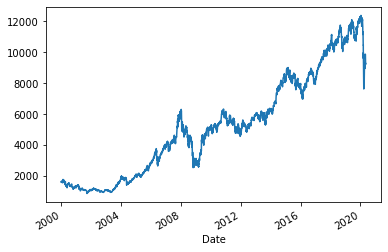

In [11]:
nifty_50_df['Close'].plot()

In [12]:
nifty_50_df.describe()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
count,5061.000000,5061.000000,5061.000000,5061.000000,5.061000e+03,5.061000e+03,5061.000000,5061.000000,5061.000000
mean,5216.237977,5251.466667,5174.455009,5213.433768,1.665927e+08,6.832610e+10,20.037014,3.547459,1.428164
std,3274.529979,3283.745772,3257.303609,3270.073955,1.423491e+08,5.500614e+10,4.194021,0.799204,0.402380
min,853.000000,877.000000,849.950000,854.200000,1.394931e+06,4.012000e+08,10.680000,1.920000,0.590000
25%,1983.200000,1999.700000,1964.650000,1982.750000,7.772637e+07,3.018170e+10,17.110000,3.030000,1.180000
50%,5096.700000,5135.550000,5038.850000,5090.850000,1.370896e+08,5.794450e+10,20.090000,3.470000,1.330000
75%,7895.400000,7929.100000,7837.700000,7887.800000,1.983420e+08,8.494440e+10,22.860000,3.790000,1.550000
max,12430.500000,12430.500000,12321.400000,12362.300000,1.811564e+09,5.970553e+11,29.900000,6.550000,3.180000


In [13]:
close_price = nifty_50_df['Close']
mavg = close_price.rolling(window=60).mean()

In [14]:
mavg.tail(10)

Date
2020-04-24    10366.870833
2020-04-27    10319.592500
2020-04-28    10275.010833
2020-04-29    10232.075000
2020-04-30    10195.810000
2020-05-04    10151.333333
2020-05-05    10110.395833
2020-05-06    10069.779167
2020-05-07    10023.435833
2020-05-08     9976.141667
Name: Close, dtype: float64

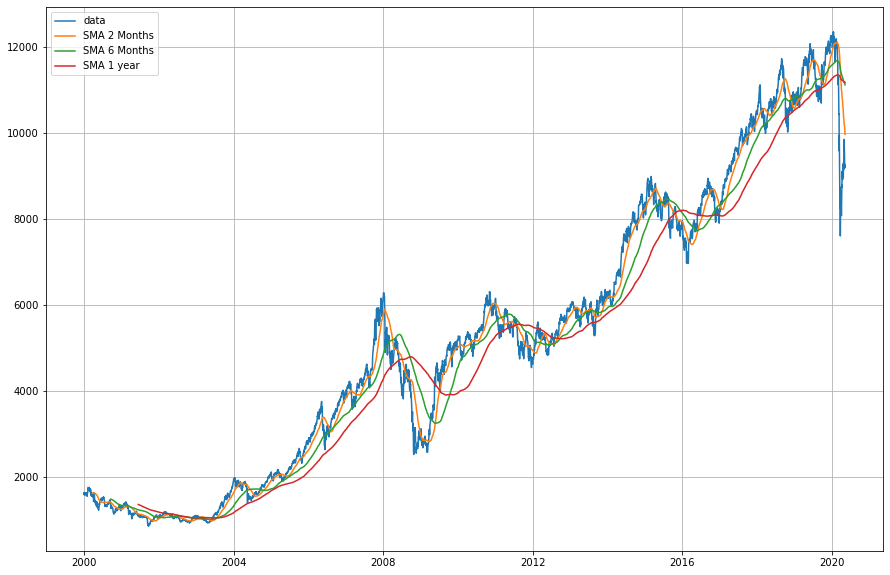

In [15]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(nifty_50_df['Close'],label='data')
plt.plot(close_price.rolling(window=60).mean(),label='SMA 2 Months')
plt.plot(close_price.rolling(window=180).mean(),label='SMA 6 Months')
plt.plot(close_price.rolling(window=365).mean(),label='SMA 1 year')
plt.legend(loc=2)

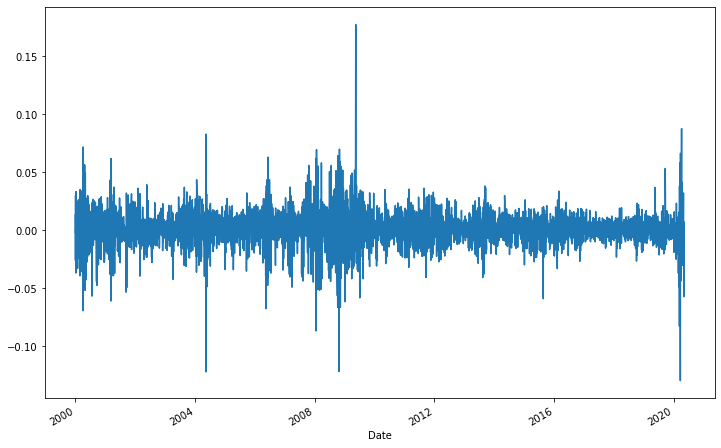

In [16]:
plt.figure(figsize=(12,8))
rets = close_price / close_price.shift(1) - 1
rets.plot(label='return')

In [17]:
from functools import reduce

In [18]:
df_final = reduce(lambda left,right: pd.merge(left,right["Close"],on='Date'), list_df)

In [19]:
df_final.columns

Index(['Open', 'High', 'Low', 'Close_x', 'Volume', 'Turnover', 'P/E', 'P/B',
       'Div Yield', 'Close_y', 'Close_x', 'Close_y', 'Close_x', 'Close_y',
       'Close_x', 'Close_y', 'Close_x', 'Close_y', 'Close_x', 'Close_y',
       'Close'],
      dtype='object')

In [20]:
delete=['Open', 'High', 'Low', 'Volume', 'Turnover', 'P/E', 'P/B',
       'Div Yield']
for d in delete:
    del df_final[d]

In [21]:
df_final

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close
Date,,,,,,,,,,,,,
2011-07-12,5526.15,20.8300,5447.85,4459.30,3719.53,11022.55,10328.75,6415.45,3795.90,2463.62,11159.35,4818.80,2671.67
2011-07-13,5585.45,19.5200,5506.60,4508.40,3774.28,11142.25,10393.70,6408.55,3837.31,2492.07,11282.35,4889.60,2704.57
2011-07-14,5599.80,19.9700,5527.20,4525.50,3783.65,11263.80,10361.90,6325.90,3868.91,2503.11,11390.45,4934.75,2710.47
2011-07-15,5581.10,19.9500,5511.85,4514.65,3759.19,11234.55,10298.25,6346.05,3831.68,2498.99,11390.15,4922.30,2713.97
2011-07-18,5567.05,20.2000,5502.35,4509.75,3720.54,11228.85,10313.15,6296.75,3854.30,2504.91,11414.35,4868.45,2713.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,9293.50,43.6700,9454.05,7596.90,5476.20,19743.75,27599.00,13454.25,1713.80,4950.30,23108.95,9364.60,3502.00
2020-05-05,9205.60,43.6075,9358.90,7523.05,5451.90,19271.75,27138.60,13388.00,1693.65,4918.05,22791.50,9181.50,3459.05
2020-05-06,9270.90,41.2475,9428.55,7575.50,5552.40,19694.55,26630.20,13394.70,1697.95,4943.65,23009.80,9227.15,3472.65


In [22]:
df_final.columns=["nifty_50","indiavix", "nifty_100" ,"nifty_500" ,"nifty_auto ", "nifty_BANK" ," nifty_FMCG", "nifty_IT" ,"nifty_metal", "nifty_midcap" ,"nifty_next_50" ,"nifty_pharma" ,"nifty_smallcap"]

In [23]:
df_final

,nifty_50,indiavix,nifty_100,nifty_500,nifty_auto,nifty_BANK,nifty_FMCG,nifty_IT,nifty_metal,nifty_midcap,nifty_next_50,nifty_pharma,nifty_smallcap
Date,,,,,,,,,,,,,
2011-07-12,5526.15,20.8300,5447.85,4459.30,3719.53,11022.55,10328.75,6415.45,3795.90,2463.62,11159.35,4818.80,2671.67
2011-07-13,5585.45,19.5200,5506.60,4508.40,3774.28,11142.25,10393.70,6408.55,3837.31,2492.07,11282.35,4889.60,2704.57
2011-07-14,5599.80,19.9700,5527.20,4525.50,3783.65,11263.80,10361.90,6325.90,3868.91,2503.11,11390.45,4934.75,2710.47
2011-07-15,5581.10,19.9500,5511.85,4514.65,3759.19,11234.55,10298.25,6346.05,3831.68,2498.99,11390.15,4922.30,2713.97
2011-07-18,5567.05,20.2000,5502.35,4509.75,3720.54,11228.85,10313.15,6296.75,3854.30,2504.91,11414.35,4868.45,2713.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,9293.50,43.6700,9454.05,7596.90,5476.20,19743.75,27599.00,13454.25,1713.80,4950.30,23108.95,9364.60,3502.00
2020-05-05,9205.60,43.6075,9358.90,7523.05,5451.90,19271.75,27138.60,13388.00,1693.65,4918.05,22791.50,9181.50,3459.05
2020-05-06,9270.90,41.2475,9428.55,7575.50,5552.40,19694.55,26630.20,13394.70,1697.95,4943.65,23009.80,9227.15,3472.65


In [24]:
df_final=fill(df_final)

In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2163 entries, 2011-07-12 to 2020-05-08
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nifty_50        2163 non-null   float64
 1   indiavix        2163 non-null   float64
 2   nifty_100       2163 non-null   float64
 3   nifty_500       2163 non-null   float64
 4   nifty_auto      2163 non-null   float64
 5   nifty_BANK      2163 non-null   float64
 6    nifty_FMCG     2163 non-null   float64
 7   nifty_IT        2163 non-null   float64
 8   nifty_metal     2163 non-null   float64
 9   nifty_midcap    2163 non-null   float64
 10  nifty_next_50   2163 non-null   float64
 11  nifty_pharma    2163 non-null   float64
 12  nifty_smallcap  2163 non-null   float64
dtypes: float64(13)
memory usage: 236.6 KB


In [26]:
ret_df=df_final.pct_change()

In [27]:
ret_df

,nifty_50,indiavix,nifty_100,nifty_500,nifty_auto,nifty_BANK,nifty_FMCG,nifty_IT,nifty_metal,nifty_midcap,nifty_next_50,nifty_pharma,nifty_smallcap
Date,,,,,,,,,,,,,
2011-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-13,0.010731,-0.062890,0.010784,0.011011,0.014720,0.010860,0.006288,-0.001076,0.010909,0.011548,0.011022,0.014692,0.012314
2011-07-14,0.002569,0.023053,0.003741,0.003793,0.002483,0.010909,-0.003060,-0.012897,0.008235,0.004430,0.009581,0.009234,0.002181
2011-07-15,-0.003339,-0.001002,-0.002777,-0.002398,-0.006465,-0.002597,-0.006143,0.003185,-0.009623,-0.001646,-0.000026,-0.002523,0.001291
2011-07-18,-0.002517,0.012531,-0.001724,-0.001085,-0.010281,-0.000507,0.001447,-0.007769,0.005903,0.002369,0.002125,-0.010940,-0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,-0.057445,0.284884,-0.055247,-0.051916,-0.072051,-0.083157,-0.037333,-0.046363,-0.078553,-0.038702,-0.041232,0.004021,-0.031460
2020-05-05,-0.009458,-0.001431,-0.010064,-0.009721,-0.004437,-0.023906,-0.016682,-0.004924,-0.011757,-0.006515,-0.013737,-0.019552,-0.012264
2020-05-06,0.007094,-0.054119,0.007442,0.006972,0.018434,0.021939,-0.018733,0.000500,0.002539,0.005205,0.009578,0.004972,0.003932


In [28]:
ret_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2163 entries, 2011-07-12 to 2020-05-08
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nifty_50        2162 non-null   float64
 1   indiavix        2162 non-null   float64
 2   nifty_100       2162 non-null   float64
 3   nifty_500       2162 non-null   float64
 4   nifty_auto      2162 non-null   float64
 5   nifty_BANK      2162 non-null   float64
 6    nifty_FMCG     2162 non-null   float64
 7   nifty_IT        2162 non-null   float64
 8   nifty_metal     2162 non-null   float64
 9   nifty_midcap    2162 non-null   float64
 10  nifty_next_50   2162 non-null   float64
 11  nifty_pharma    2162 non-null   float64
 12  nifty_smallcap  2162 non-null   float64
dtypes: float64(13)
memory usage: 236.6 KB


In [29]:
ret_df.dropna()

,nifty_50,indiavix,nifty_100,nifty_500,nifty_auto,nifty_BANK,nifty_FMCG,nifty_IT,nifty_metal,nifty_midcap,nifty_next_50,nifty_pharma,nifty_smallcap
Date,,,,,,,,,,,,,
2011-07-13,0.010731,-0.062890,0.010784,0.011011,0.014720,0.010860,0.006288,-0.001076,0.010909,0.011548,0.011022,0.014692,0.012314
2011-07-14,0.002569,0.023053,0.003741,0.003793,0.002483,0.010909,-0.003060,-0.012897,0.008235,0.004430,0.009581,0.009234,0.002181
2011-07-15,-0.003339,-0.001002,-0.002777,-0.002398,-0.006465,-0.002597,-0.006143,0.003185,-0.009623,-0.001646,-0.000026,-0.002523,0.001291
2011-07-18,-0.002517,0.012531,-0.001724,-0.001085,-0.010281,-0.000507,0.001447,-0.007769,0.005903,0.002369,0.002125,-0.010940,-0.000004
2011-07-19,0.008353,-0.047030,0.006952,0.006431,-0.002975,0.007570,0.006758,0.010990,0.007841,0.004467,0.000149,0.008011,0.006352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,-0.057445,0.284884,-0.055247,-0.051916,-0.072051,-0.083157,-0.037333,-0.046363,-0.078553,-0.038702,-0.041232,0.004021,-0.031460
2020-05-05,-0.009458,-0.001431,-0.010064,-0.009721,-0.004437,-0.023906,-0.016682,-0.004924,-0.011757,-0.006515,-0.013737,-0.019552,-0.012264
2020-05-06,0.007094,-0.054119,0.007442,0.006972,0.018434,0.021939,-0.018733,0.000500,0.002539,0.005205,0.009578,0.004972,0.003932


In [30]:
ret_df.corr()

,nifty_50,indiavix,nifty_100,nifty_500,nifty_auto,nifty_BANK,nifty_FMCG,nifty_IT,nifty_metal,nifty_midcap,nifty_next_50,nifty_pharma,nifty_smallcap
nifty_50,1.000000,-0.533203,0.996635,0.986321,0.825480,0.896837,0.665802,0.562065,0.745053,0.849530,0.858867,0.542100,0.780907
indiavix,-0.533203,1.000000,-0.541454,-0.548523,-0.462529,-0.468559,-0.353898,-0.306572,-0.462273,-0.520150,-0.522460,-0.333806,-0.515386
nifty_100,0.996635,-0.541454,1.000000,0.995201,0.835516,0.898280,0.665191,0.544164,0.762457,0.880418,0.897839,0.559162,0.813933
nifty_500,0.986321,-0.548523,0.995201,1.000000,0.840753,0.893340,0.655407,0.525454,0.776122,0.920367,0.923278,0.571073,0.863200
nifty_auto,0.825480,-0.462529,0.835516,0.840753,1.000000,0.729417,0.519036,0.368037,0.679053,0.785167,0.788780,0.459369,0.721419
nifty_BANK,0.896837,-0.468559,0.898280,0.893340,0.729417,1.000000,0.499896,0.342405,0.653016,0.793934,0.798298,0.401981,0.727279
nifty_FMCG,0.665802,-0.353898,0.665191,0.655407,0.519036,0.499896,1.000000,0.325257,0.425915,0.547952,0.583655,0.425465,0.497847
nifty_IT,0.562065,-0.306572,0.544164,0.525454,0.368037,0.342405,0.325257,1.000000,0.330336,0.400320,0.382726,0.314258,0.359646
nifty_metal,0.745053,-0.462273,0.762457,0.776122,0.679053,0.653016,0.425915,0.330336,1.000000,0.750000,0.764750,0.426885,0.723383
nifty_midcap,0.849530,-0.520150,0.880418,0.920367,0.785167,0.793934,0.547952,0.400320,0.750000,1.000000,0.940545,0.553792,0.948768


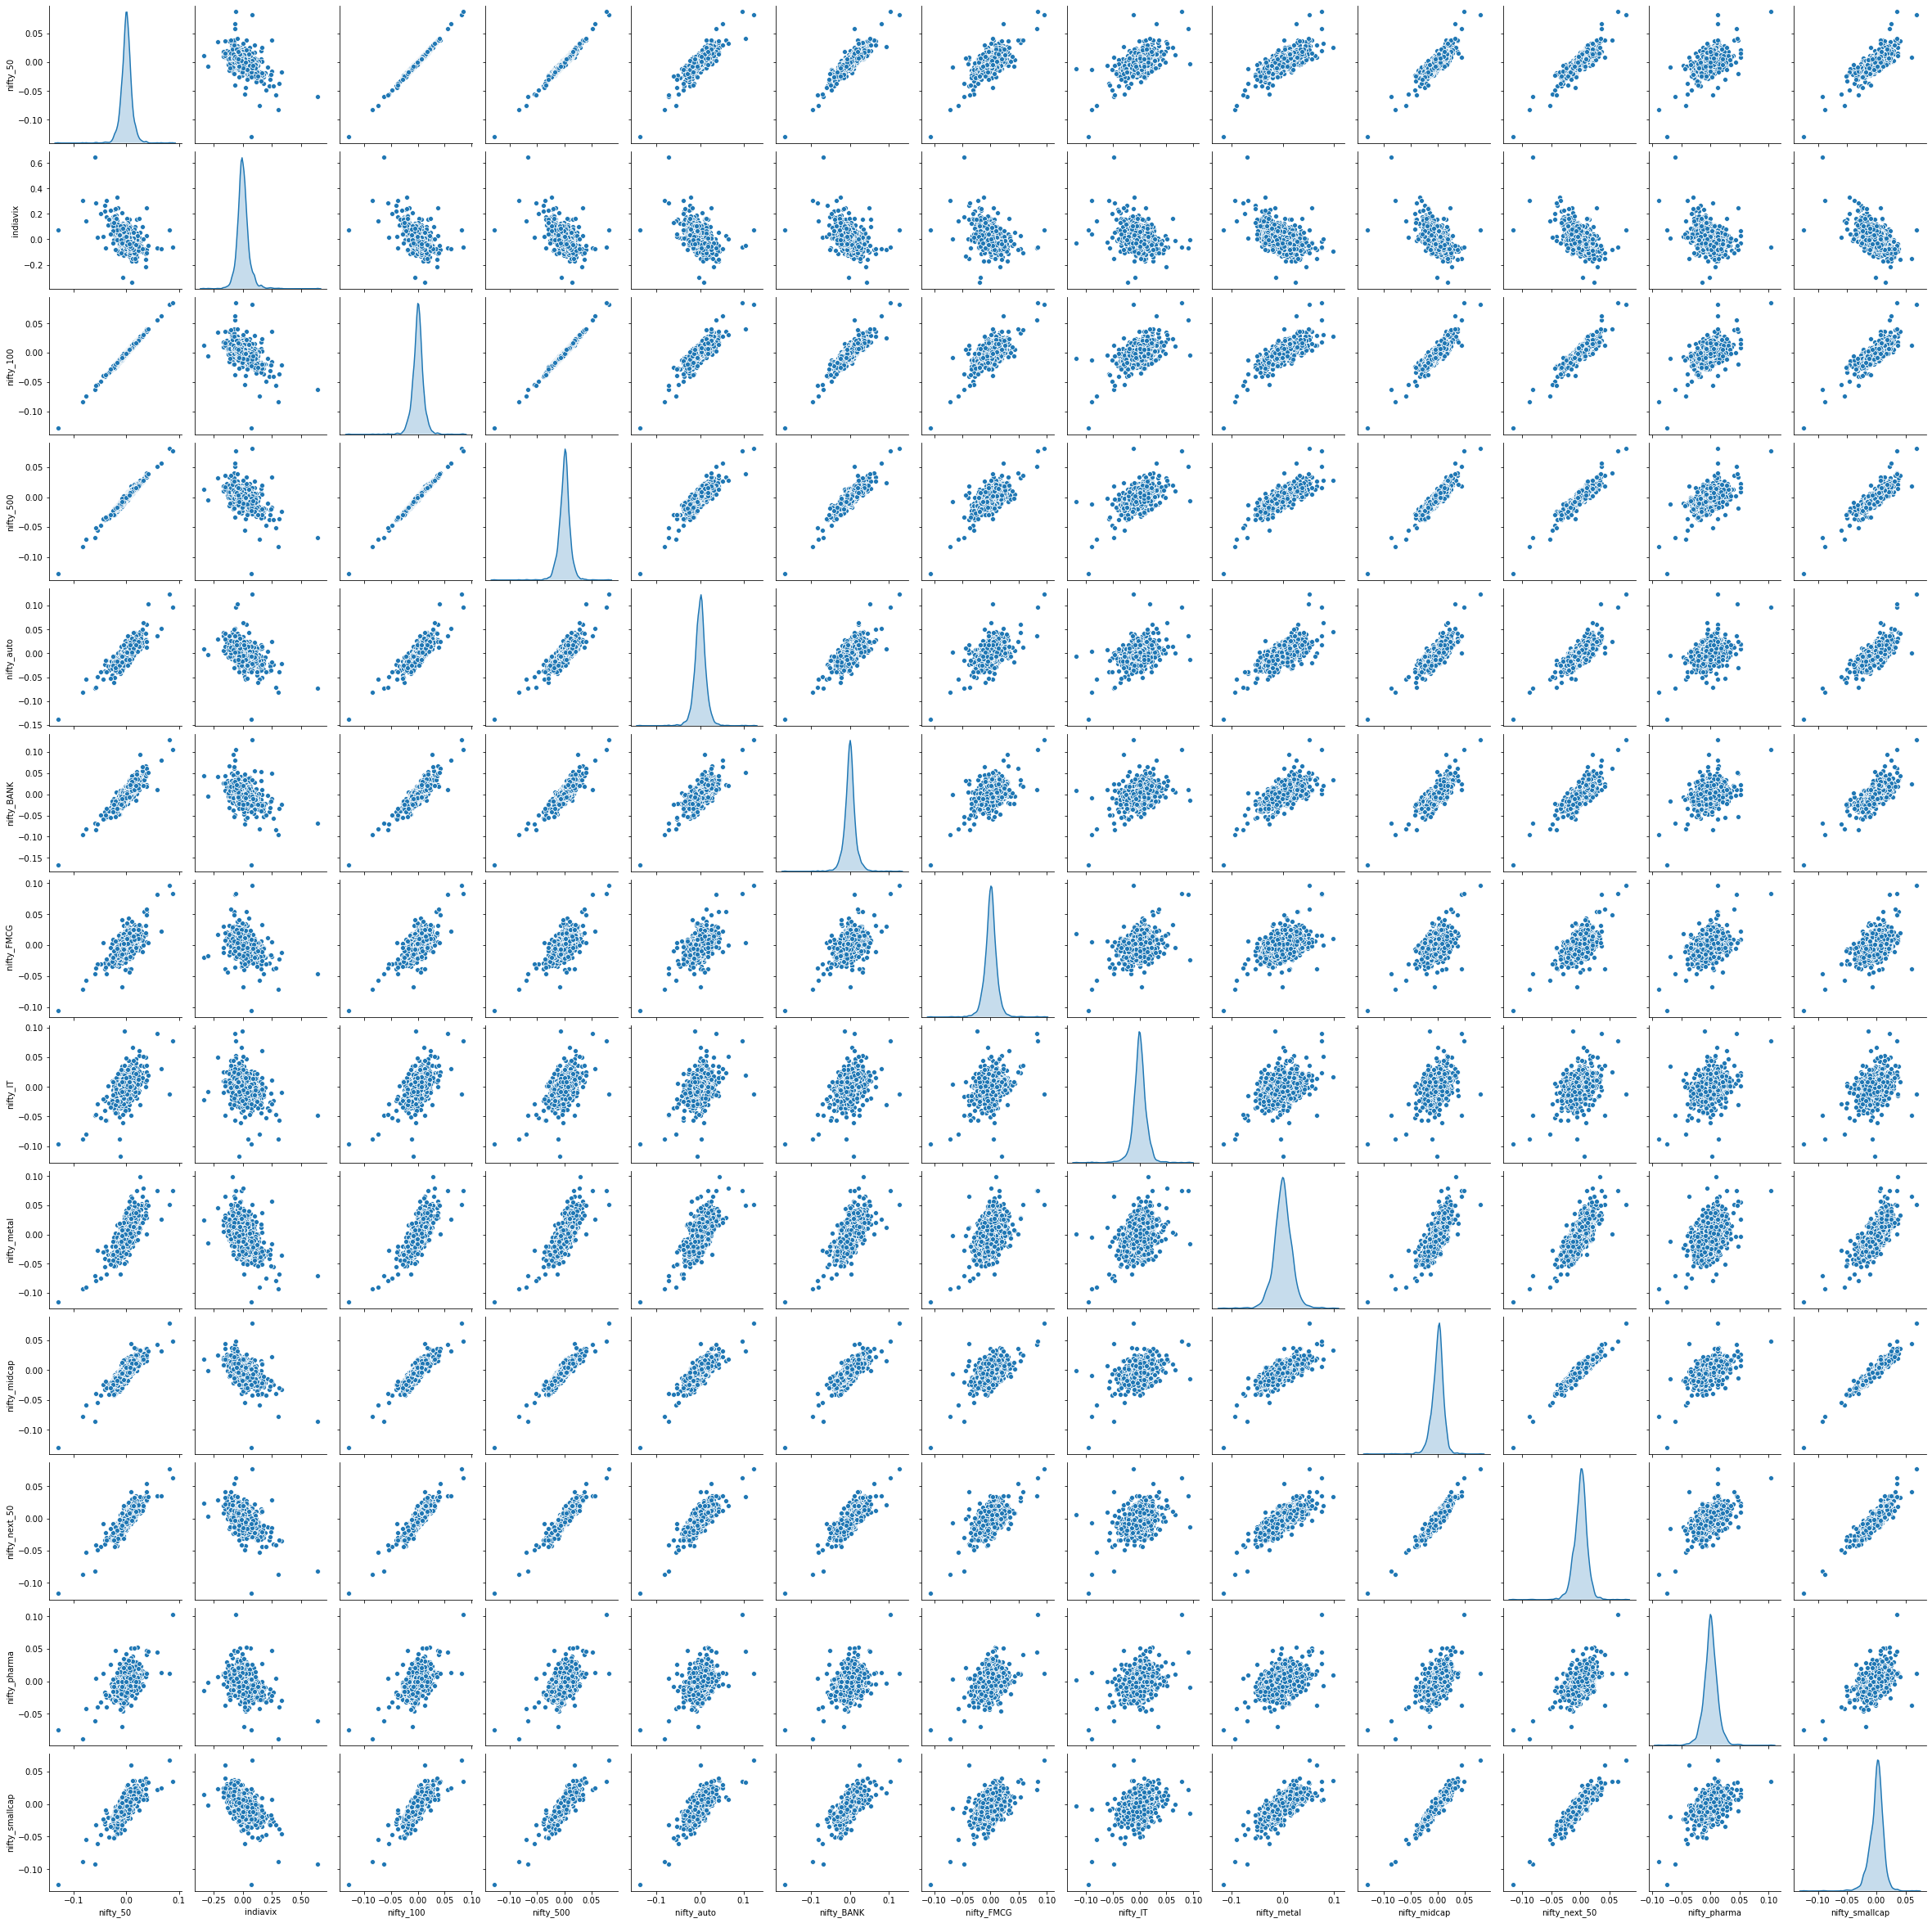

In [31]:
sns.pairplot(ret_df,diag_kind="kde")

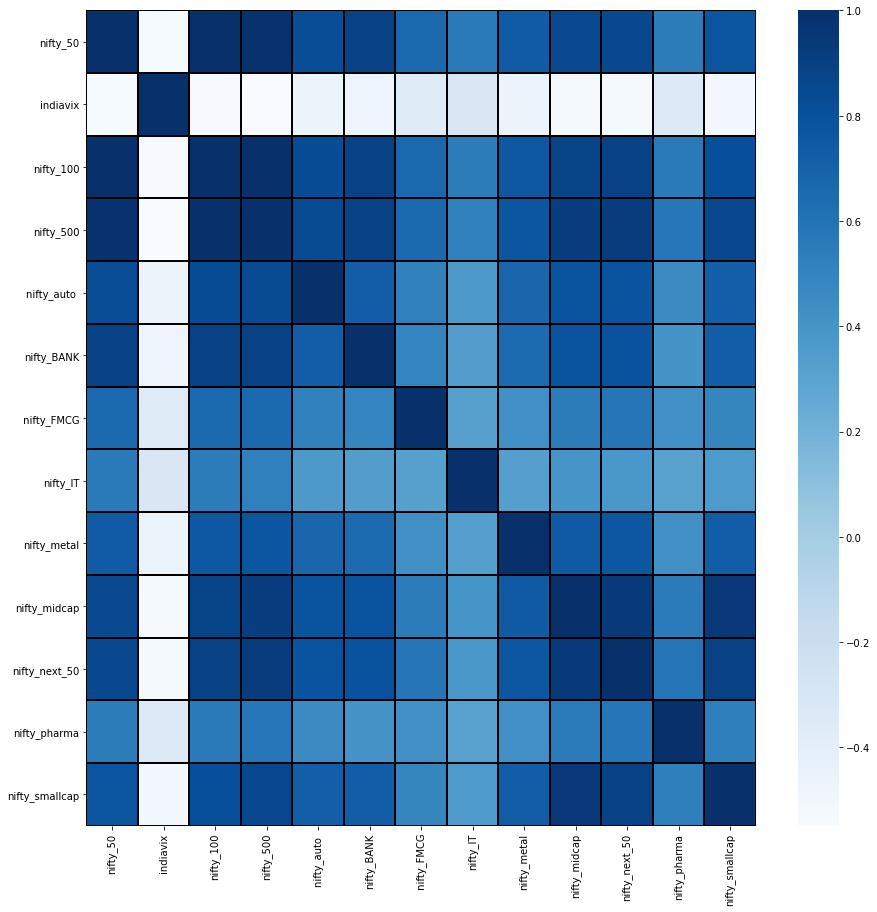

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(ret_df.corr()),cmap="Blues",linecolor = 'black' , linewidth = 1 , fmt='')

In [33]:
ret_df=df_final.pct_change(periods=365)

In [34]:
ret_df=ret_df.dropna()

In [35]:
ret_df.mean()

nifty_50          0.174344
indiavix          0.054733
nifty_100         0.183175
nifty_500         0.186459
nifty_auto        0.197154
nifty_BANK        0.251267
 nifty_FMCG       0.219172
nifty_IT          0.232183
nifty_metal       0.050000
nifty_midcap      0.253035
nifty_next_50     0.239394
nifty_pharma      0.152459
nifty_smallcap    0.212450
dtype: float64

Text(0.5, 0, 'Average year Return')

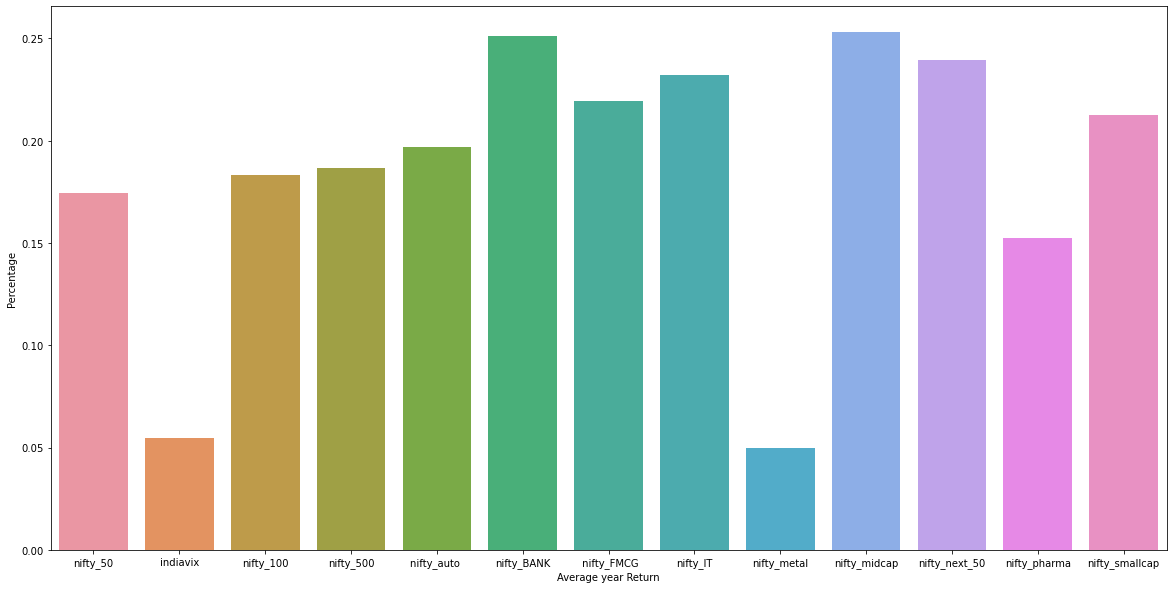

In [36]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x=df_final.columns,y=ret_df.mean())
ax.set_ylabel("Percentage")
ax.set_xlabel("Average year Return")

In [37]:
len(df_final)

2163

In [38]:
test_ind=len(df_final)-90

In [39]:
train=df_final.iloc[:test_ind]
test=df_final.iloc[test_ind:]

In [40]:
len(train)

2073

In [41]:
len(test)

90

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [44]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [45]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [46]:
length=30
generator=TimeseriesGenerator(scaled_train,scaled_train,
                             length=length,batch_size=1)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [48]:
scaled_train.shape

(2073, 13)

In [49]:
n_features=scaled_train.shape[1]

In [50]:
lstm_model = Sequential()

lstm_model.add(LSTM(64,input_shape=(length,n_features),activation='relu'))

lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(32,activation='relu'))

lstm_model.add(Dense(n_features))

lstm_model.compile(optimizer='adam',loss="mse")

In [51]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                19968     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 13)                429       
Total params: 22,477
Trainable params: 22,477
Non-trainable params: 0
_________________________________________________________________


In [52]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [53]:
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,
                                        length=length,batch_size=1)

In [54]:
lstm_model.fit_generator(generator,epochs=10,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Train for 2043 steps, validate for 60 steps
Epoch 1/10
2043/2043 [==============================] - 62s 30ms/step - loss: 0.0124 - val_loss: 0.0444
Epoch 2/10
2043/2043 [==============================] - 58s 29ms/step - loss: 0.0045 - val_loss: 0.0312
Epoch 3/10
2043/2043 [==============================] - 59s 29ms/step - loss: 0.0036 - val_loss: 0.0372
Epoch 4/10
2043/2043 [==============================] - 58s 28ms/step - loss: 0.0031 - val_loss: 0.0246
Epoch 5/10
2043/2043 [==============================] - 58s 28ms/step - loss: 0.0027 - val_loss: 0.0296
Epoch 6/10
2043/2043 [==============================] - 59s 29ms/step - loss: 0.0023 - val_loss: 0.0288


In [55]:
losses=pd.DataFrame(lstm_model.history.history)

In [56]:
losses

,loss,val_loss
0,0.012424,0.044410
1,0.004479,0.031223
2,0.003626,0.037241
3,0.003113,0.024573
4,0.002667,0.029555
5,0.002322,0.028784


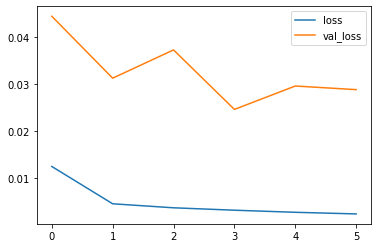

In [57]:
losses.plot()

In [58]:
first_eval_batch= scaled_train[-length:]

In [59]:
first_eval_batch.shape

(30, 13)

In [60]:
first_eval_batch=first_eval_batch.reshape((1,length,scaled_train.shape[1]))

In [61]:
lstm_model.predict(first_eval_batch)

array([[0.92516196, 0.12673718, 0.92773604, 0.9599097 , 0.60142326,
        0.91741997, 0.9213853 , 0.91286886, 0.49285394, 0.79420346,
        0.8428379 , 0.45668292, 0.5564367 ]], dtype=float32)

In [62]:
scaled_train[0]

array([0.1270705 , 0.38090434, 0.13066625, 0.14195099, 0.04764328,
       0.1311294 , 0.0314836 , 0.11429063, 0.85191563, 0.11214048,
       0.12121225, 0.04316829, 0.13997495])

In [63]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = lstm_model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [64]:
true_predictions=scaler.inverse_transform(test_predictions)

In [65]:
true_predictions=pd.DataFrame(data=true_predictions,columns=test.columns)

In [66]:
true_predictions

,nifty_50,indiavix,nifty_100,nifty_500,nifty_auto,nifty_BANK,nifty_FMCG,nifty_IT,nifty_metal,nifty_midcap,nifty_next_50,nifty_pharma,nifty_smallcap
0,11693.481545,13.902039,11788.540229,9733.497601,8540.129367,30354.604351,31078.498627,15693.132168,2826.379565,6308.920558,28206.926826,8713.673594,5042.832530
1,11535.127432,14.161045,11649.265274,9598.463376,8553.264636,29628.452464,30732.147680,15536.037309,2819.681824,6209.239149,27928.520445,8766.836614,5034.730205
2,11440.598780,14.272165,11566.879429,9526.364849,8592.957888,29166.636511,30532.862118,15441.682478,2829.309826,6156.434439,27798.432532,8816.225253,5042.254593
3,11371.461670,14.293790,11505.677405,9480.233629,8645.709619,28811.438900,30390.602646,15367.210591,2845.779934,6122.114737,27728.337753,8869.824491,5055.775210
4,11312.341248,14.253503,11460.806699,9440.217880,8722.902414,28527.244467,30278.346081,15290.500636,2870.078879,6106.827112,27691.003623,8920.416519,5083.633295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10107.167601,12.630658,10510.067705,8983.506121,11348.216021,24245.334107,26685.243736,11561.946834,3671.767990,6595.536825,29173.941898,9626.714427,6614.052416
86,10107.283212,12.631202,10510.216116,8983.644480,11348.452617,24245.696076,26685.435528,11562.029930,3671.896261,6595.700810,29174.514991,9626.578565,6614.243818
87,10107.389611,12.631702,10510.352198,8983.772462,11348.670536,24246.028736,26685.613422,11562.107487,3672.014552,6595.851355,29175.043025,9626.455054,6614.419608
88,10107.488179,12.632161,10510.476901,8983.890451,11348.870813,24246.336484,26685.780197,11562.178812,3672.122866,6595.989801,29175.526000,9626.340526,6614.580467


In [67]:
test

,nifty_50,indiavix,nifty_100,nifty_500,nifty_auto,nifty_BANK,nifty_FMCG,nifty_IT,nifty_metal,nifty_midcap,nifty_next_50,nifty_pharma,nifty_smallcap
Date,,,,,,,,,,,,,
2019-12-27,12245.80,10.5250,12344.60,9908.70,8205.90,32412.35,30145.45,15780.70,2760.35,6285.95,28476.80,8068.05,4795.30
2019-12-30,12255.85,11.0075,12354.25,9924.70,8325.40,32354.90,30225.35,15775.00,2796.50,6311.80,28484.85,8083.10,4834.30
2019-12-31,12168.45,11.6675,12267.75,9872.55,8248.30,32161.65,30121.50,15652.40,2801.30,6321.60,28307.55,8040.15,4857.40
2020-01-01,12182.50,11.5975,12279.05,9888.55,8210.10,32102.90,30234.25,15722.15,2796.05,6343.95,28293.35,8047.10,4892.70
2020-01-02,12282.20,11.4900,12380.50,9980.00,8267.45,32443.85,30266.20,15709.65,2869.90,6422.85,28535.40,8053.95,4971.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,9293.50,43.6700,9454.05,7596.90,5476.20,19743.75,27599.00,13454.25,1713.80,4950.30,23108.95,9364.60,3502.00
2020-05-05,9205.60,43.6075,9358.90,7523.05,5451.90,19271.75,27138.60,13388.00,1693.65,4918.05,22791.50,9181.50,3459.05
2020-05-06,9270.90,41.2475,9428.55,7575.50,5552.40,19694.55,26630.20,13394.70,1697.95,4943.65,23009.80,9227.15,3472.65


In [68]:
true_predictions.index=test.index

In [69]:
true_predictions

,nifty_50,indiavix,nifty_100,nifty_500,nifty_auto,nifty_BANK,nifty_FMCG,nifty_IT,nifty_metal,nifty_midcap,nifty_next_50,nifty_pharma,nifty_smallcap
Date,,,,,,,,,,,,,
2019-12-27,11693.481545,13.902039,11788.540229,9733.497601,8540.129367,30354.604351,31078.498627,15693.132168,2826.379565,6308.920558,28206.926826,8713.673594,5042.832530
2019-12-30,11535.127432,14.161045,11649.265274,9598.463376,8553.264636,29628.452464,30732.147680,15536.037309,2819.681824,6209.239149,27928.520445,8766.836614,5034.730205
2019-12-31,11440.598780,14.272165,11566.879429,9526.364849,8592.957888,29166.636511,30532.862118,15441.682478,2829.309826,6156.434439,27798.432532,8816.225253,5042.254593
2020-01-01,11371.461670,14.293790,11505.677405,9480.233629,8645.709619,28811.438900,30390.602646,15367.210591,2845.779934,6122.114737,27728.337753,8869.824491,5055.775210
2020-01-02,11312.341248,14.253503,11460.806699,9440.217880,8722.902414,28527.244467,30278.346081,15290.500636,2870.078879,6106.827112,27691.003623,8920.416519,5083.633295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,10107.167601,12.630658,10510.067705,8983.506121,11348.216021,24245.334107,26685.243736,11561.946834,3671.767990,6595.536825,29173.941898,9626.714427,6614.052416
2020-05-05,10107.283212,12.631202,10510.216116,8983.644480,11348.452617,24245.696076,26685.435528,11562.029930,3671.896261,6595.700810,29174.514991,9626.578565,6614.243818
2020-05-06,10107.389611,12.631702,10510.352198,8983.772462,11348.670536,24246.028736,26685.613422,11562.107487,3672.014552,6595.851355,29175.043025,9626.455054,6614.419608


In [70]:
def plot_test(df1,df2,attribute):
  plt.figure(figsize=(20,8))
  plt.plot(df1[attribute],label="True Value")
  plt.plot(df2[attribute],label="Predictions")
  plt.title(attribute,fontweight="bold",fontsize=18)
  plt.legend(loc=2)

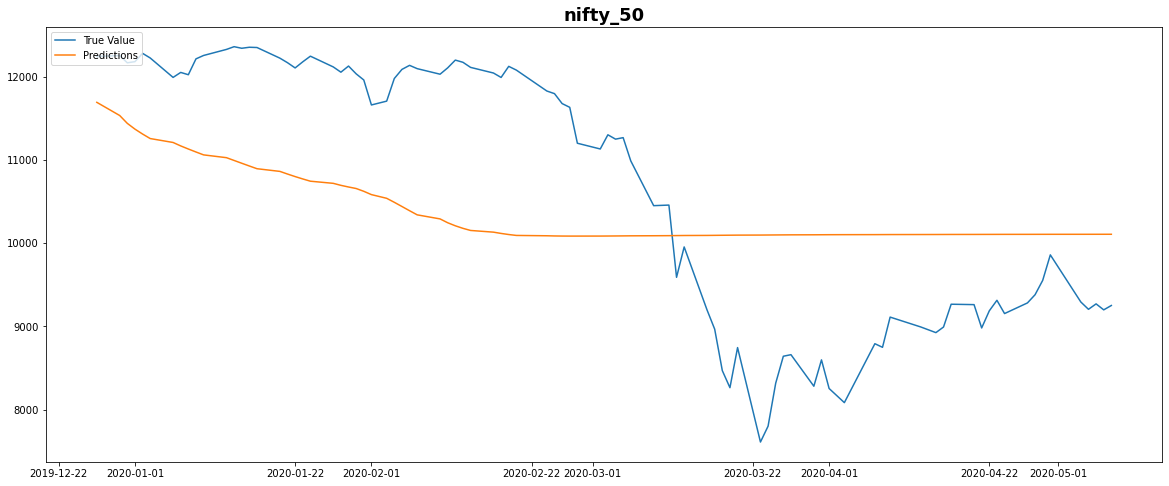

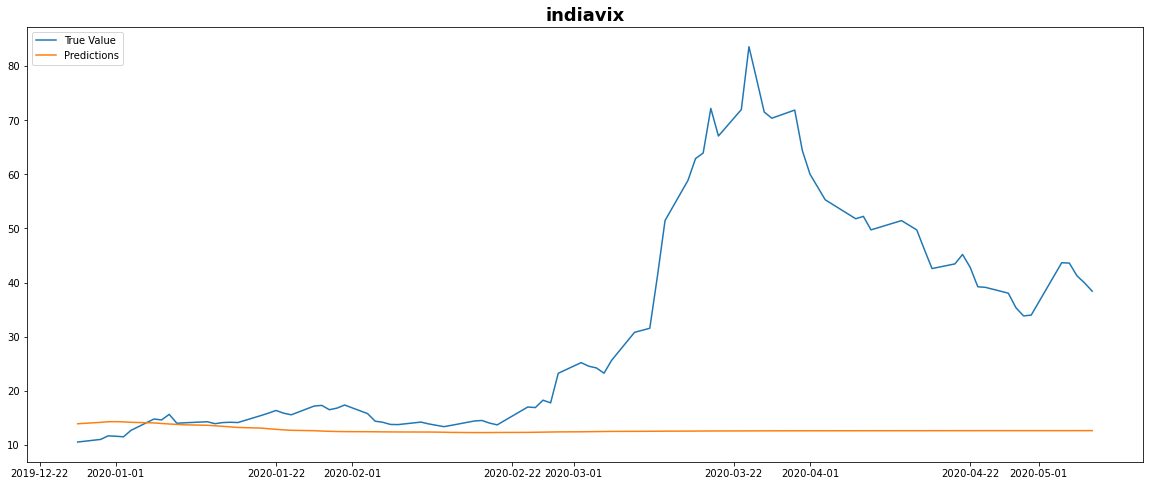

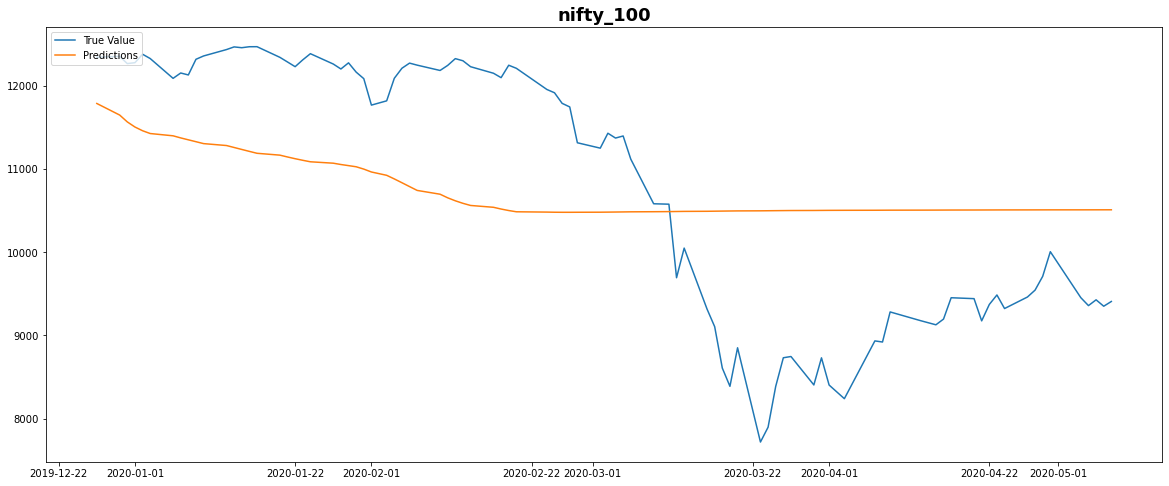

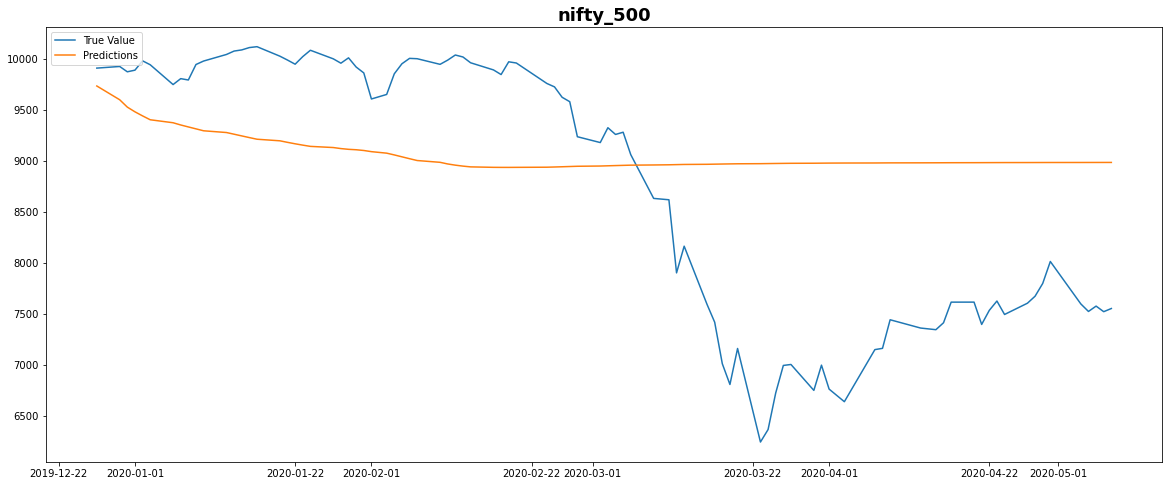

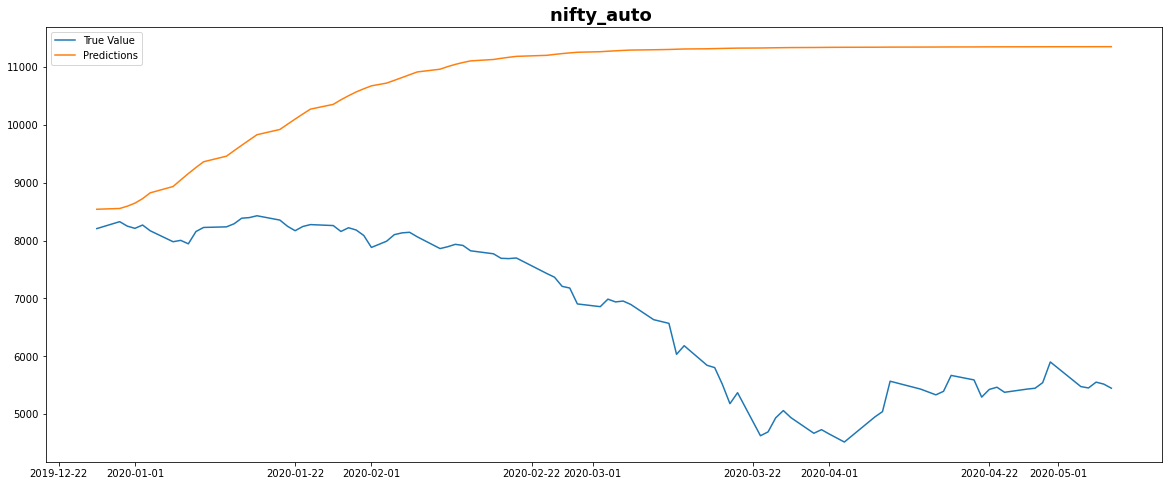

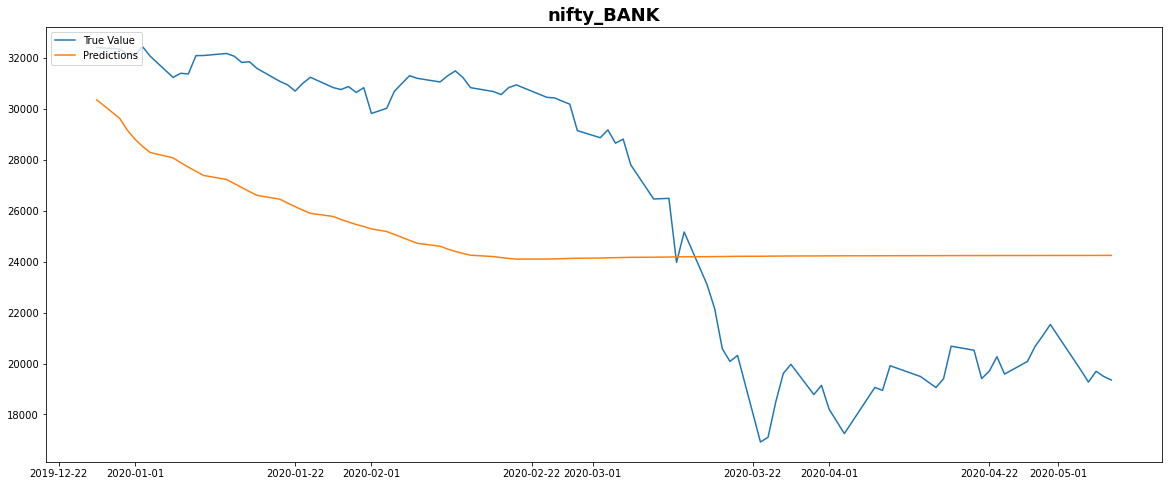

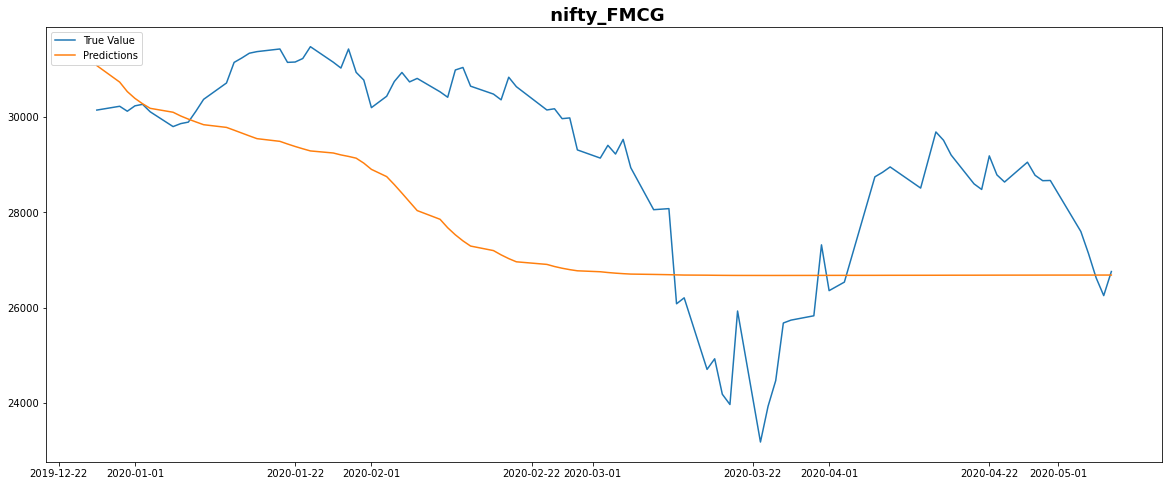

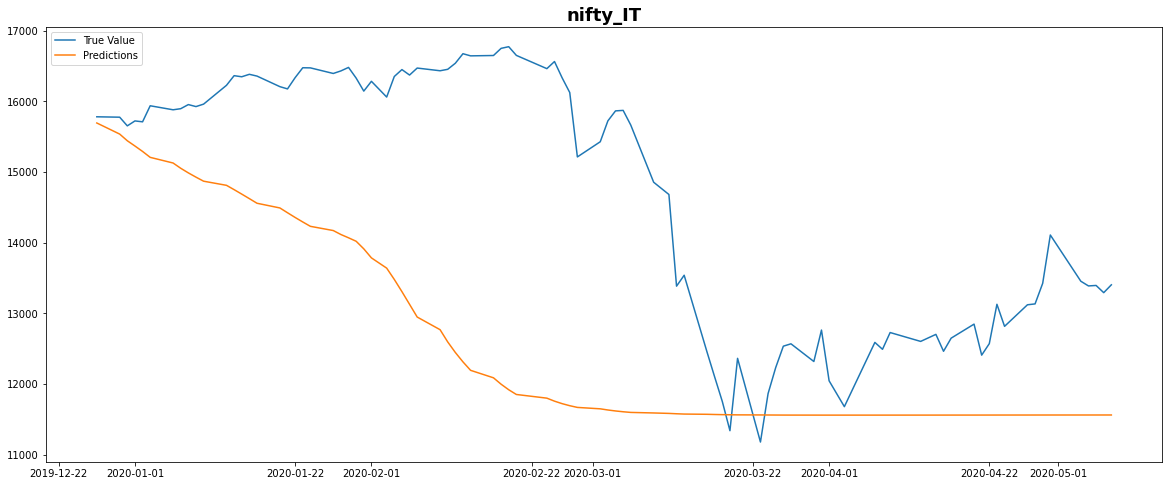

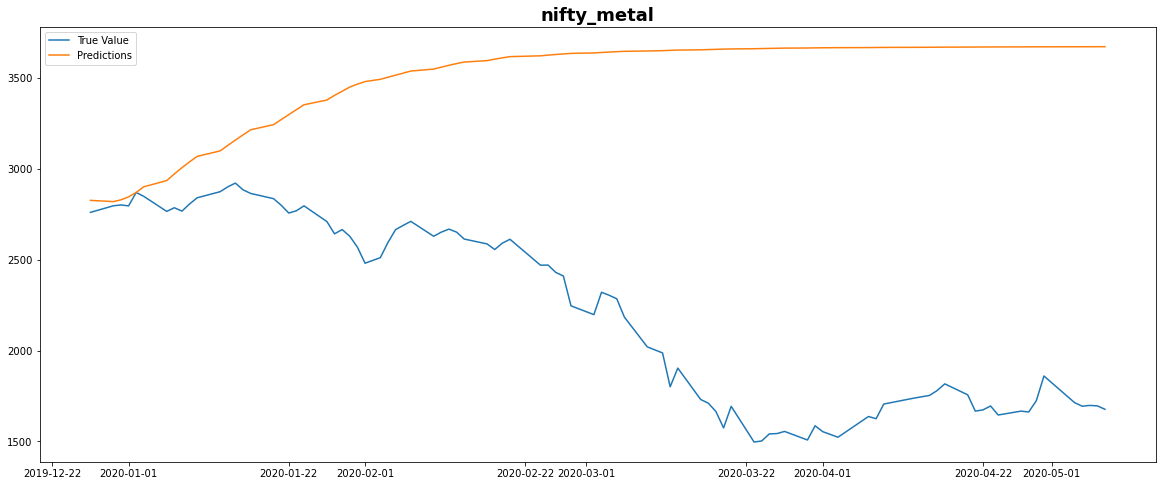

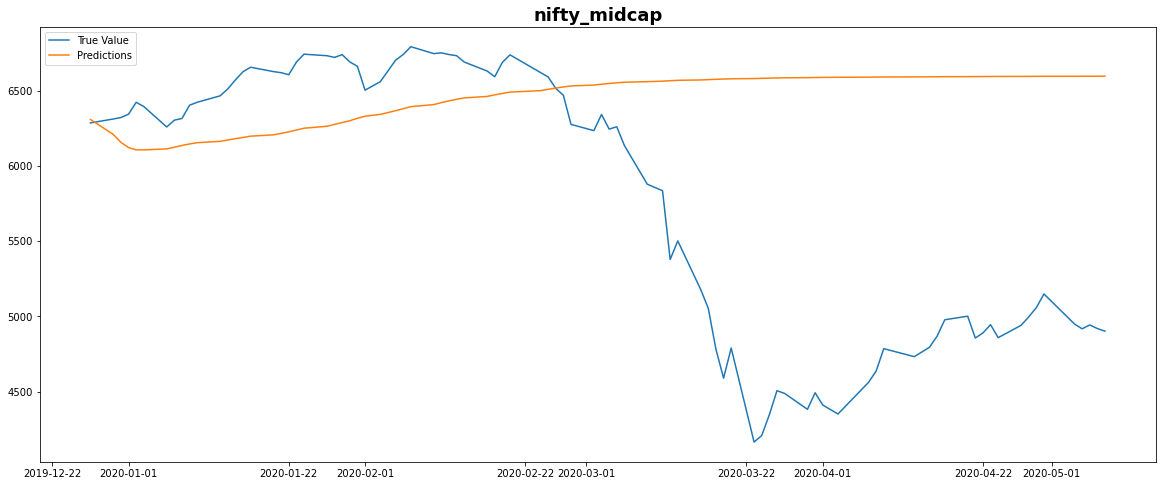

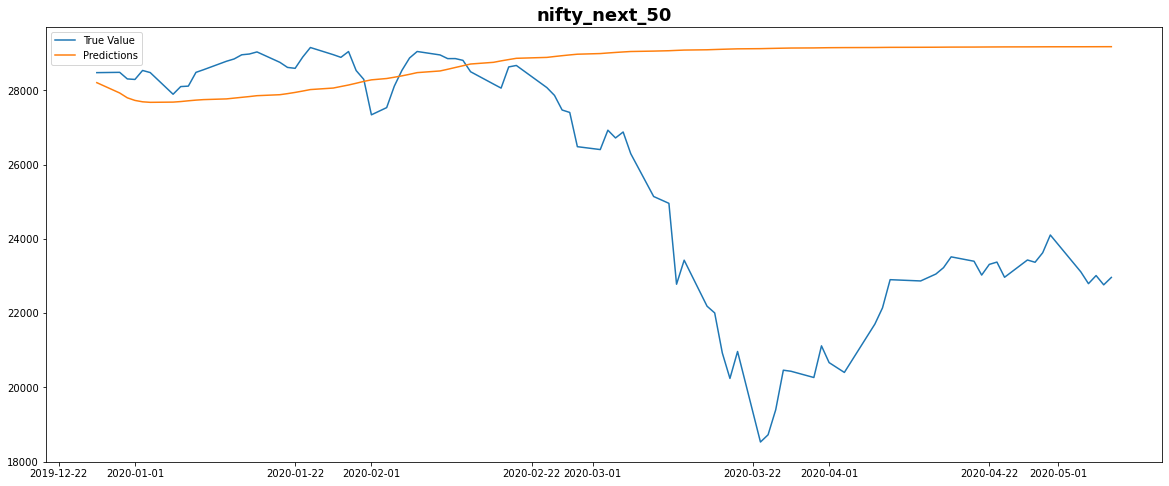

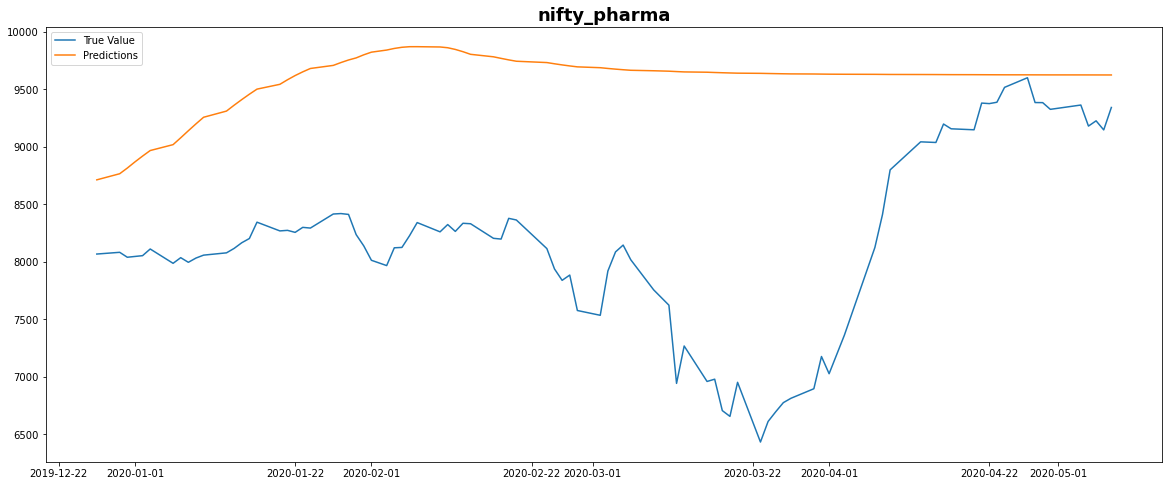

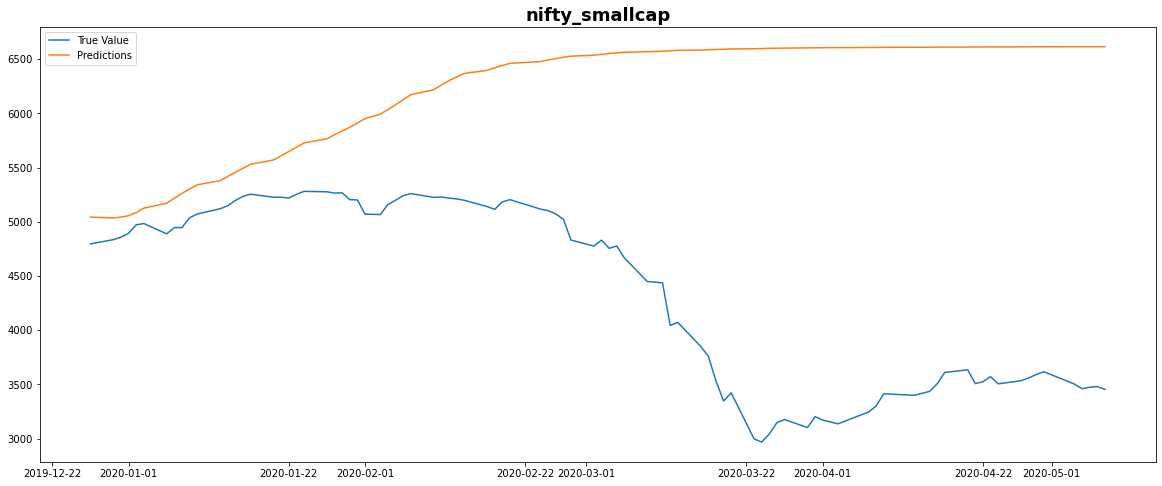

In [71]:
for attr in df_final.columns:
   plot_test(test,true_predictions,attr)   

In [72]:
from tensorflow.keras.models import load_model

In [73]:
lstm_model.save("NSE_Stock_Model.h5")

In [74]:
forecast=[]
period=60

first_eval_batch=scaled_test[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(period):
     current_pred=lstm_model.predict(current_batch)[0]
     
     forecast.append(current_pred)
     
     current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

In [75]:
forecast=scaler.inverse_transform(forecast)

In [76]:
forecast=pd.DataFrame(forecast)

In [77]:
forecast.columns=test.columns

In [78]:
forecast

,nifty_50,indiavix,nifty_100,nifty_500,nifty_auto,nifty_BANK,nifty_FMCG,nifty_IT,nifty_metal,nifty_midcap,nifty_next_50,nifty_pharma,nifty_smallcap
0,9915.341164,33.903272,9886.658735,7921.002241,7245.128076,22134.275117,27506.537852,14018.412514,2052.178937,4678.470108,23401.449545,9694.446680,3974.205227
1,10015.715302,30.652882,9940.694856,8080.192038,7396.418192,22875.031815,27043.110529,14070.700372,2186.392384,4891.652745,23605.596014,9477.121397,4118.065193
2,10155.193991,27.685040,10101.733049,8252.418333,7554.239624,23727.119786,26844.615760,14312.196471,2329.784645,5098.931564,23973.493631,9358.324686,4285.280219
3,10287.599694,25.001141,10263.750373,8402.681664,7705.478375,24602.894045,26729.130700,14549.284295,2478.185084,5306.406292,24368.616691,9228.363152,4455.743980
4,10438.038381,22.790807,10424.275531,8570.018888,7884.683793,25352.450852,26917.648126,14714.267793,2626.848661,5486.123096,24821.537670,9086.950753,4608.184436
5,10571.667901,21.366484,10602.406537,8720.135019,8115.037687,25753.450064,27414.612606,14774.111212,2730.074435,5629.616553,25395.993815,9081.125250,4748.058229
6,10676.824918,20.230629,10746.514080,8844.070540,8338.610180,26071.186028,27834.604649,14834.910241,2822.748242,5753.141066,25875.989571,9100.799413,4872.400670
7,10758.674150,19.296854,10864.512754,8947.885194,8558.096190,26321.737812,28191.001038,14884.545932,2906.777560,5860.508964,26289.292497,9135.372358,4987.189324
8,10818.417305,18.500796,10957.019437,9032.059777,8771.073715,26502.199401,28484.481383,14916.030550,2982.325262,5952.001173,26639.959302,9182.208814,5092.640366
9,10857.330707,17.802591,11025.735394,9095.954764,8971.016629,26611.731084,28713.133325,14925.420468,3048.968393,6026.735263,26925.518787,9237.131302,5186.979600


In [79]:
test.tail()

,nifty_50,indiavix,nifty_100,nifty_500,nifty_auto,nifty_BANK,nifty_FMCG,nifty_IT,nifty_metal,nifty_midcap,nifty_next_50,nifty_pharma,nifty_smallcap
Date,,,,,,,,,,,,,
2020-05-04,9293.50,43.6700,9454.05,7596.90,5476.20,19743.75,27599.00,13454.25,1713.80,4950.30,23108.95,9364.60,3502.00
2020-05-05,9205.60,43.6075,9358.90,7523.05,5451.90,19271.75,27138.60,13388.00,1693.65,4918.05,22791.50,9181.50,3459.05
2020-05-06,9270.90,41.2475,9428.55,7575.50,5552.40,19694.55,26630.20,13394.70,1697.95,4943.65,23009.80,9227.15,3472.65
2020-05-07,9199.05,39.9300,9351.45,7520.85,5519.00,19491.80,26254.55,13292.70,1695.55,4919.85,22759.85,9148.10,3479.50
2020-05-08,9251.50,38.4075,9408.65,7552.00,5447.75,19352.90,26759.80,13403.60,1676.55,4902.25,22959.50,9343.35,3453.40


In [80]:
forecast_index=pd.date_range(start='2020-05-09',periods=period)

In [81]:
forecast_index

DatetimeIndex(['2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01',
               '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
               '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13',
               '2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17',
               '2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21',
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03',
      

In [82]:
forecast.index=forecast_index

In [83]:
forecast

,nifty_50,indiavix,nifty_100,nifty_500,nifty_auto,nifty_BANK,nifty_FMCG,nifty_IT,nifty_metal,nifty_midcap,nifty_next_50,nifty_pharma,nifty_smallcap
2020-05-09,9915.341164,33.903272,9886.658735,7921.002241,7245.128076,22134.275117,27506.537852,14018.412514,2052.178937,4678.470108,23401.449545,9694.446680,3974.205227
2020-05-10,10015.715302,30.652882,9940.694856,8080.192038,7396.418192,22875.031815,27043.110529,14070.700372,2186.392384,4891.652745,23605.596014,9477.121397,4118.065193
2020-05-11,10155.193991,27.685040,10101.733049,8252.418333,7554.239624,23727.119786,26844.615760,14312.196471,2329.784645,5098.931564,23973.493631,9358.324686,4285.280219
2020-05-12,10287.599694,25.001141,10263.750373,8402.681664,7705.478375,24602.894045,26729.130700,14549.284295,2478.185084,5306.406292,24368.616691,9228.363152,4455.743980
2020-05-13,10438.038381,22.790807,10424.275531,8570.018888,7884.683793,25352.450852,26917.648126,14714.267793,2626.848661,5486.123096,24821.537670,9086.950753,4608.184436
2020-05-14,10571.667901,21.366484,10602.406537,8720.135019,8115.037687,25753.450064,27414.612606,14774.111212,2730.074435,5629.616553,25395.993815,9081.125250,4748.058229
2020-05-15,10676.824918,20.230629,10746.514080,8844.070540,8338.610180,26071.186028,27834.604649,14834.910241,2822.748242,5753.141066,25875.989571,9100.799413,4872.400670
2020-05-16,10758.674150,19.296854,10864.512754,8947.885194,8558.096190,26321.737812,28191.001038,14884.545932,2906.777560,5860.508964,26289.292497,9135.372358,4987.189324
2020-05-17,10818.417305,18.500796,10957.019437,9032.059777,8771.073715,26502.199401,28484.481383,14916.030550,2982.325262,5952.001173,26639.959302,9182.208814,5092.640366
2020-05-18,10857.330707,17.802591,11025.735394,9095.954764,8971.016629,26611.731084,28713.133325,14925.420468,3048.968393,6026.735263,26925.518787,9237.131302,5186.979600


In [84]:
def plot_forecast(df1,df2,attribute):
  plt.figure(figsize=(12,8))
  df2[attribute].plot(ax=df1[attribute].plot())
  plt.xlim('2020-01-01','2020-08-01')
  plt.title(attribute,fontweight="bold",fontsize=18)

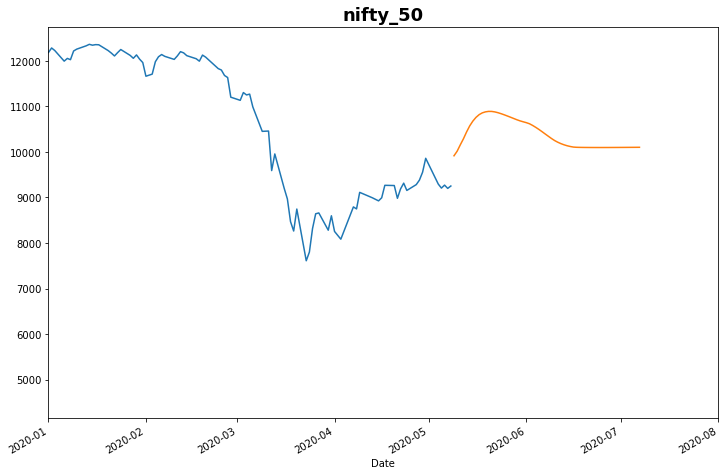

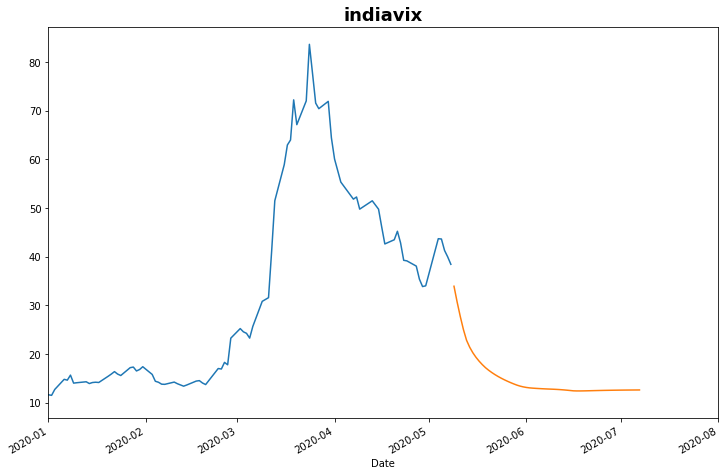

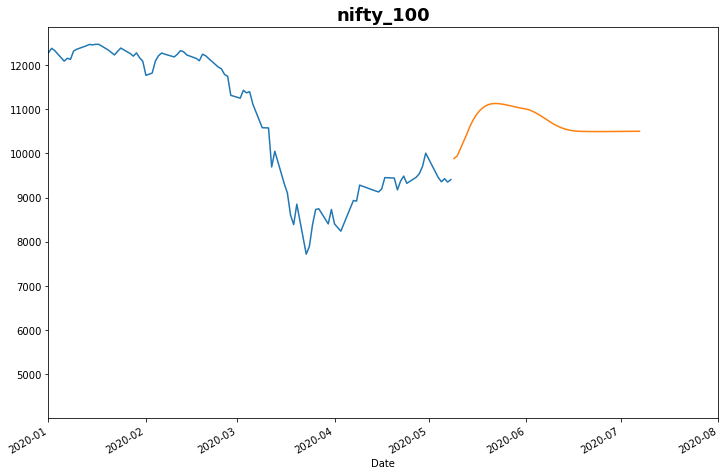

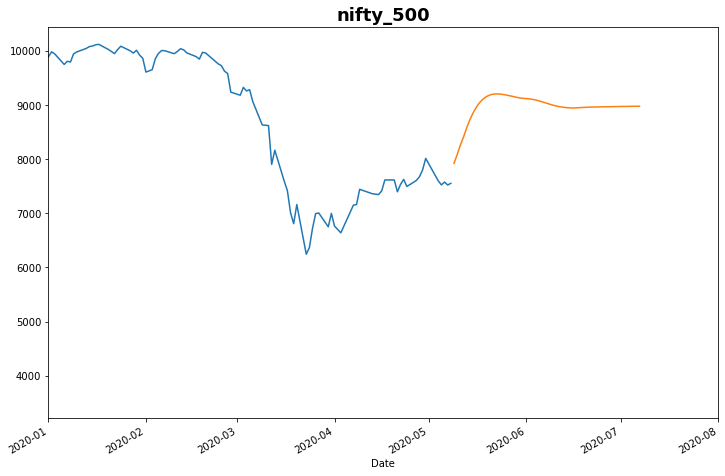

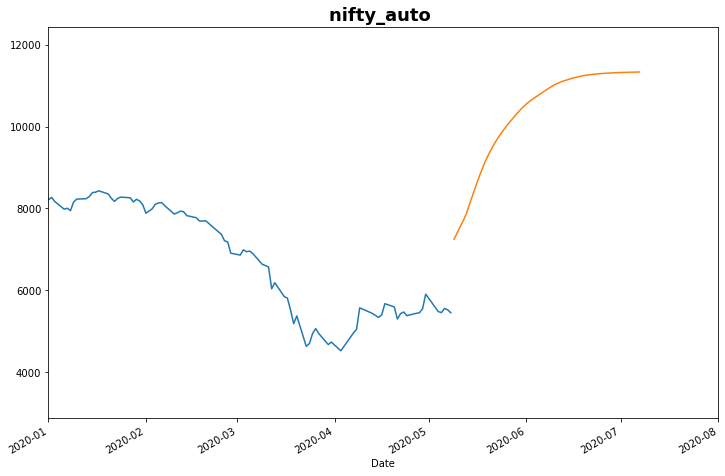

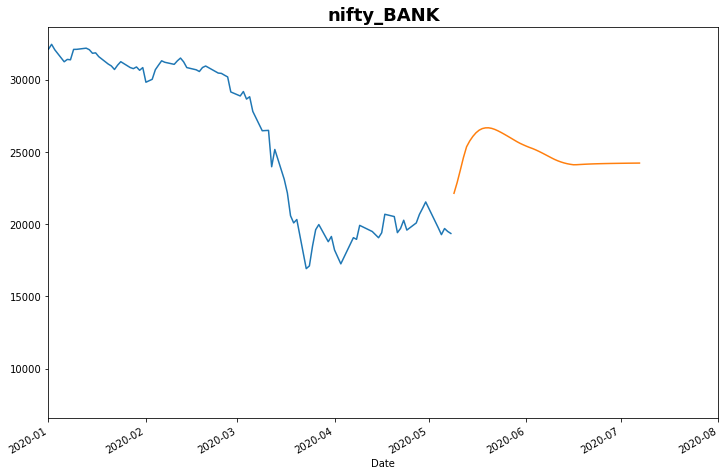

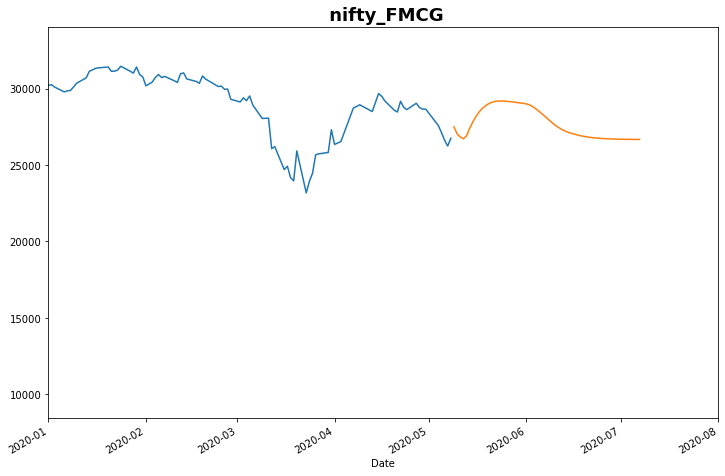

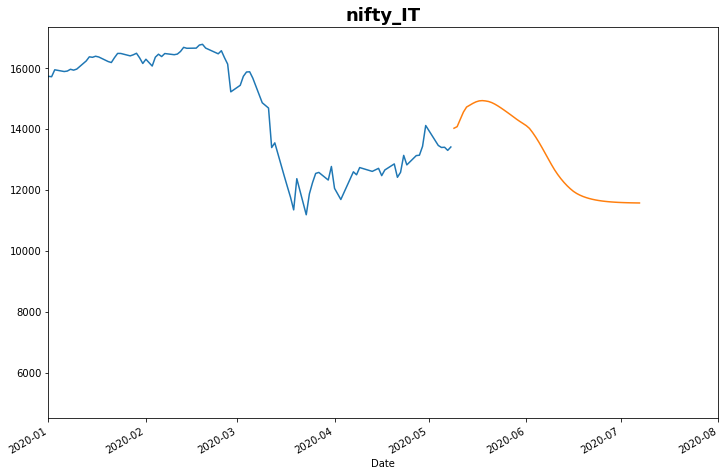

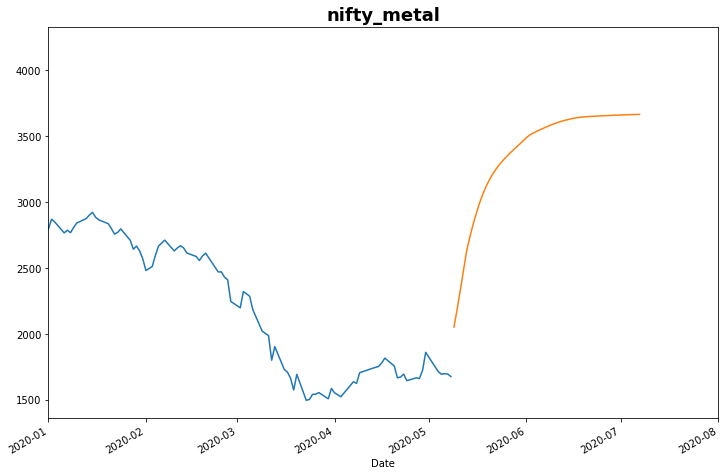

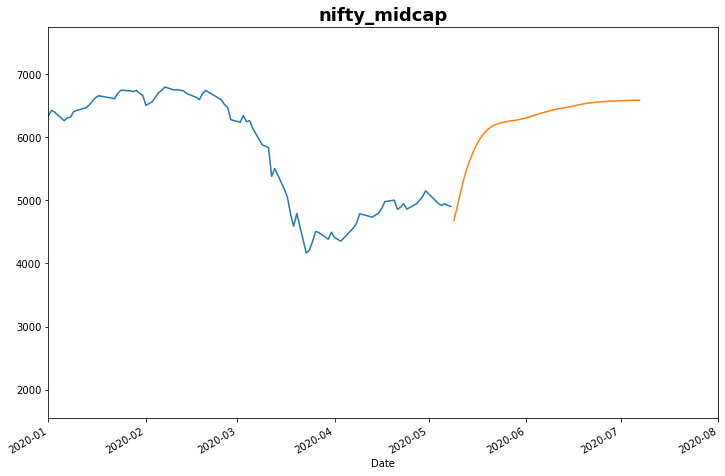

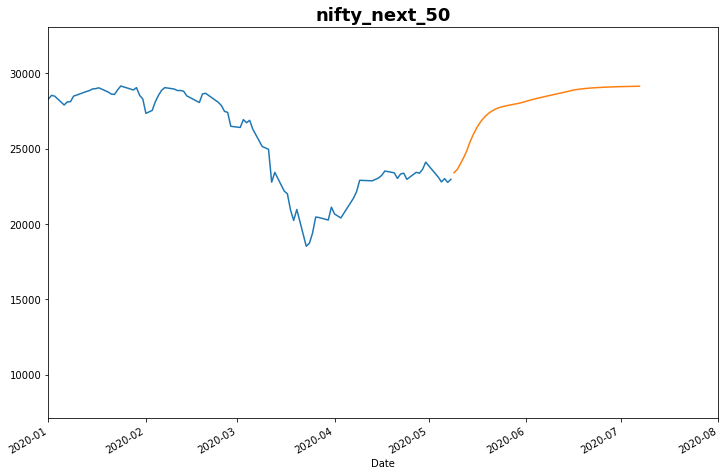

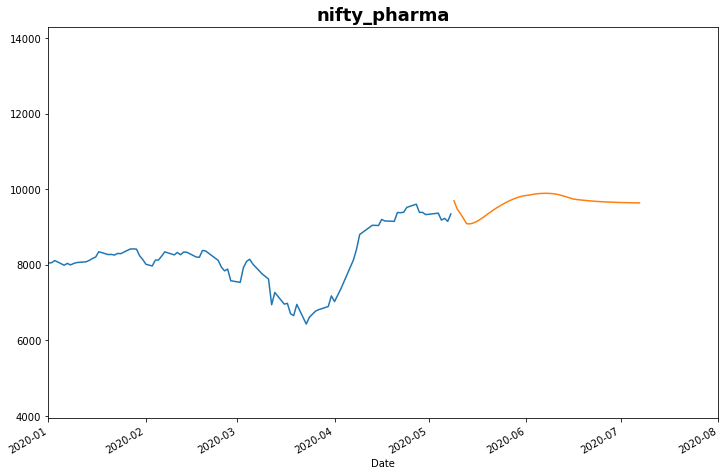

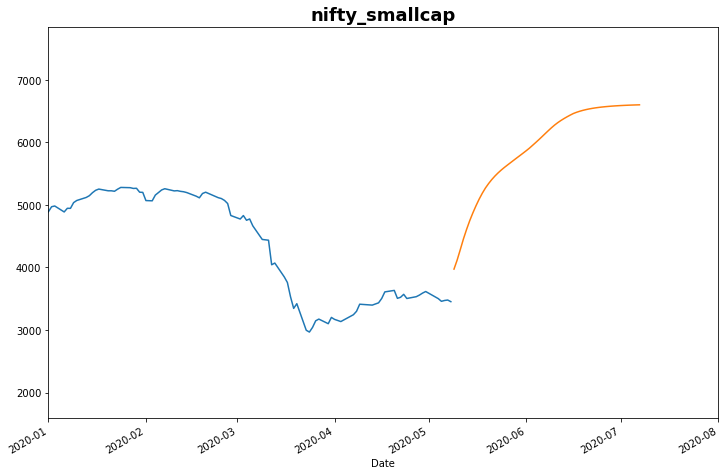

In [85]:
for attr in df_final.columns:
   plot_forecast(df_final,forecast,attr)

In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
np.sqrt(mean_squared_error(test['nifty_50'],true_predictions["nifty_50"]))

1350.1998129484052

In [88]:
error=[]
for attr in df_final.columns:
    er=np.sqrt(mean_squared_error(test[attr],true_predictions[attr]))
    error.append(er)    

In [89]:
error=pd.Series(error)

In [90]:
error.index=df_final.columns

In [91]:
error

nifty_50          1350.199813
indiavix            27.476453
nifty_100         1333.316028
nifty_500         1241.669808
nifty_auto        4426.990895
nifty_BANK        4936.175225
 nifty_FMCG       2092.654869
nifty_IT          2482.607744
nifty_metal       1448.324996
nifty_midcap      1194.468898
nifty_next_50     4734.701419
nifty_pharma      1647.883857
nifty_smallcap    2185.261079
dtype: float64

Text(0, 0.5, 'Error')

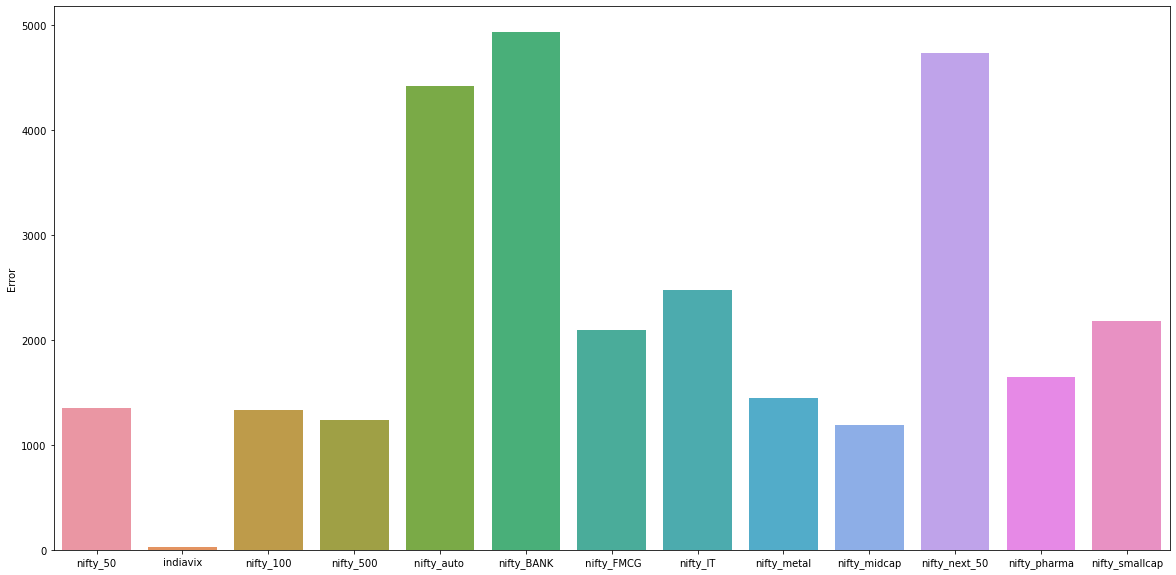

In [92]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x=df_final.columns,y=error)
ax.set_ylabel("Error")

In [93]:
Normalised_error=(error/df_final.mean())*100

In [94]:
Normalised_error

nifty_50           16.418959
indiavix          153.195754
nifty_100          16.054020
nifty_500          18.208731
nifty_auto         59.295745
nifty_BANK         26.690019
 nifty_FMCG         9.931220
nifty_IT           23.380709
nifty_metal        53.044397
nifty_midcap       27.365195
nifty_next_50      24.055600
nifty_pharma       18.912164
nifty_smallcap     53.037904
dtype: float64

Text(0, 0.5, 'Normalised_error')

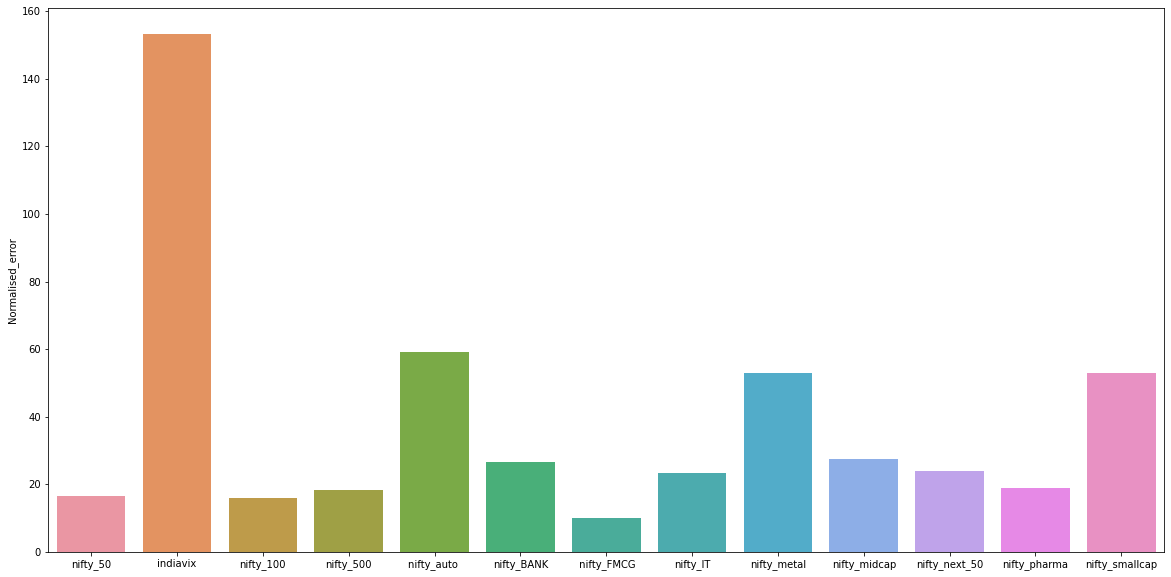

In [95]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x=df_final.columns,y=Normalised_error)
ax.set_ylabel("Normalised_error")